<a href="https://colab.research.google.com/github/achyuth1616/BASIC-ML-PROJECTS/blob/main/BATCH_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESSENTIALS OF MACHINE LEARNING PROJECT BASED LEARNING **

BATCH : 09

TEAM MEMBERS:
*      23EG106A63
*      23EG106E26
*      23EG106E37
*      23EG106E25












# Crop Yield **Prediction**

---



Import required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the dataset

In [3]:
df=pd.read_csv("/content/crop_yield.csv")
df=df[:2000]
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
1995,Arhar/Tur,2006,Rabi,Andhra Pradesh,5606.0,3174,845.2,715942.26,1233.32,0.433333
1996,Bajra,2006,Kharif,Andhra Pradesh,48995.0,39988,845.2,6257151.45,10778.90,0.737500
1997,Bajra,2006,Rabi,Andhra Pradesh,12081.0,6986,845.2,1542864.51,2657.82,0.824545
1998,Banana,2006,Whole Year,Andhra Pradesh,50286.0,1224106,845.2,6422025.06,11062.92,26.198095


printing columns of the **dataset**

In [ ]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop_Year                   2000 non-null   int64  
 1   Area                        2000 non-null   float64
 2   Production                  2000 non-null   int64  
 3   Annual_Rainfall             2000 non-null   float64
 4   Fertilizer                  2000 non-null   float64
 5   Pesticide                   2000 non-null   float64
 6   Yield                       2000 non-null   float64
 7   Crop_Arecanut               2000 non-null   bool   
 8   Crop_Arhar/Tur              2000 non-null   bool   
 9   Crop_Bajra                  2000 non-null   bool   
 10  Crop_Banana                 2000 non-null   bool   
 11  Crop_Barley                 2000 non-null   bool   
 12  Crop_Black pepper           2000 non-null   bool   
 13  Crop_Cardamom               2000 

In [120]:
df.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Andhra Pradesh,State_Assam,State_Goa,State_Karnataka,State_Kerala,State_Meghalaya,State_Puducherry,State_Tamil Nadu,State_West Bengal,Area_per_Production
Crop_Year,1.000000,-0.037751,0.009425,-0.226407,-0.030888,-0.048648,-0.010901,-0.007208,0.001104,0.012053,...,0.131414,-0.099452,-0.076188,0.021194,-0.009205,0.014018,-0.033761,0.227434,-0.149554,-0.057669
Area,-0.037751,1.000000,0.043601,-0.045742,0.999310,0.998040,0.005436,-0.018146,-0.001643,-0.011208,...,0.019413,-0.013118,-0.024802,0.017373,-0.018025,-0.045222,-0.032402,-0.004414,0.061120,-0.008006
Production,0.009425,0.043601,1.000000,0.014442,0.047069,0.035625,0.500980,-0.018312,-0.015453,-0.015965,...,-0.020558,-0.032359,-0.015846,-0.019125,0.177842,-0.036251,-0.024373,0.039178,-0.039734,-0.015933
Annual_Rainfall,-0.226407,-0.045742,0.014442,1.000000,-0.048776,-0.036550,-0.019139,0.040975,0.001492,-0.097427,...,-0.341373,0.040897,0.190363,-0.312108,0.211211,0.744031,-0.102971,-0.256400,-0.049059,-0.024863
Fertilizer,-0.030888,0.999310,0.047069,-0.048776,1.000000,0.995435,0.006271,-0.019158,-0.001147,-0.011679,...,0.021738,-0.013978,-0.026352,0.020071,-0.018905,-0.047860,-0.034366,-0.003213,0.061044,-0.008547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
State_Meghalaya,0.014018,-0.045222,-0.036251,0.744031,-0.047860,-0.038682,-0.054037,0.014918,0.028629,-0.056987,...,-0.142363,-0.132158,-0.072440,-0.173025,-0.112741,1.000000,-0.088818,-0.098654,-0.172458,-0.028182
State_Puducherry,-0.033761,-0.032402,-0.024373,-0.102971,-0.034366,-0.027667,0.040362,0.040515,-0.037897,0.030322,...,-0.097787,-0.090778,-0.049758,-0.118849,-0.077440,-0.088818,1.000000,-0.067764,-0.118459,-0.021201
State_Tamil Nadu,0.227434,-0.004414,0.039178,-0.256400,-0.003213,-0.007395,0.017767,-0.005345,0.010197,0.007225,...,-0.108616,-0.100831,-0.055269,-0.132010,-0.086016,-0.098654,-0.067764,1.000000,-0.131578,-0.002007
State_West Bengal,-0.149554,0.061120,-0.039734,-0.049059,0.061044,0.061110,0.026904,-0.028911,-0.005150,-0.009647,...,-0.189873,-0.176263,-0.096615,-0.230768,-0.150365,-0.172458,-0.118459,-0.131578,1.000000,0.060696


information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             2000 non-null   object 
 1   Crop_Year        2000 non-null   int64  
 2   Season           2000 non-null   object 
 3   State            2000 non-null   object 
 4   Area             2000 non-null   float64
 5   Production       2000 non-null   int64  
 6   Annual_Rainfall  2000 non-null   float64
 7   Fertilizer       2000 non-null   float64
 8   Pesticide        2000 non-null   float64
 9   Yield            2000 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 156.4+ KB


checking if there any null values present in the column or not

In [6]:
df.isna().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


Knowing Different  types of crops

In [7]:

crops=df['Crop']
crops


,Crop
0,Arecanut
1,Arhar/Tur
2,Castor seed
3,Coconut
4,Cotton(lint)
...,...
1995,Arhar/Tur
1996,Bajra
1997,Bajra
1998,Banana


<Axes: xlabel='State', ylabel='Crop'>

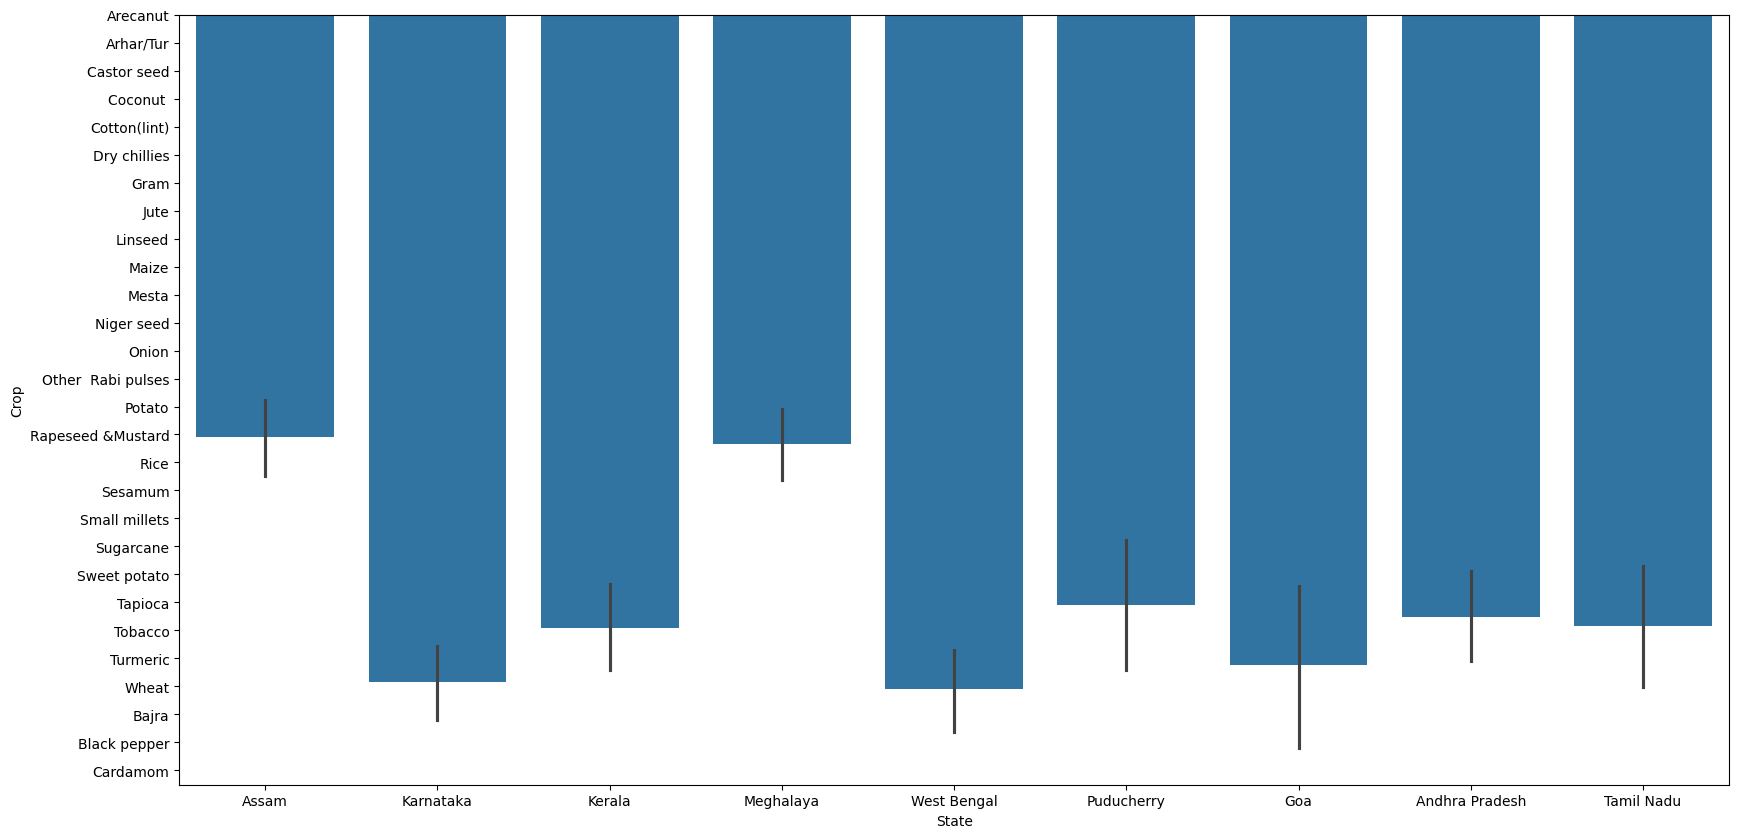

In [8]:
#bar plot for crops with statewise
plt.figure(figsize=(20,10))
sns.barplot(x='State',y='Crop',data=df)

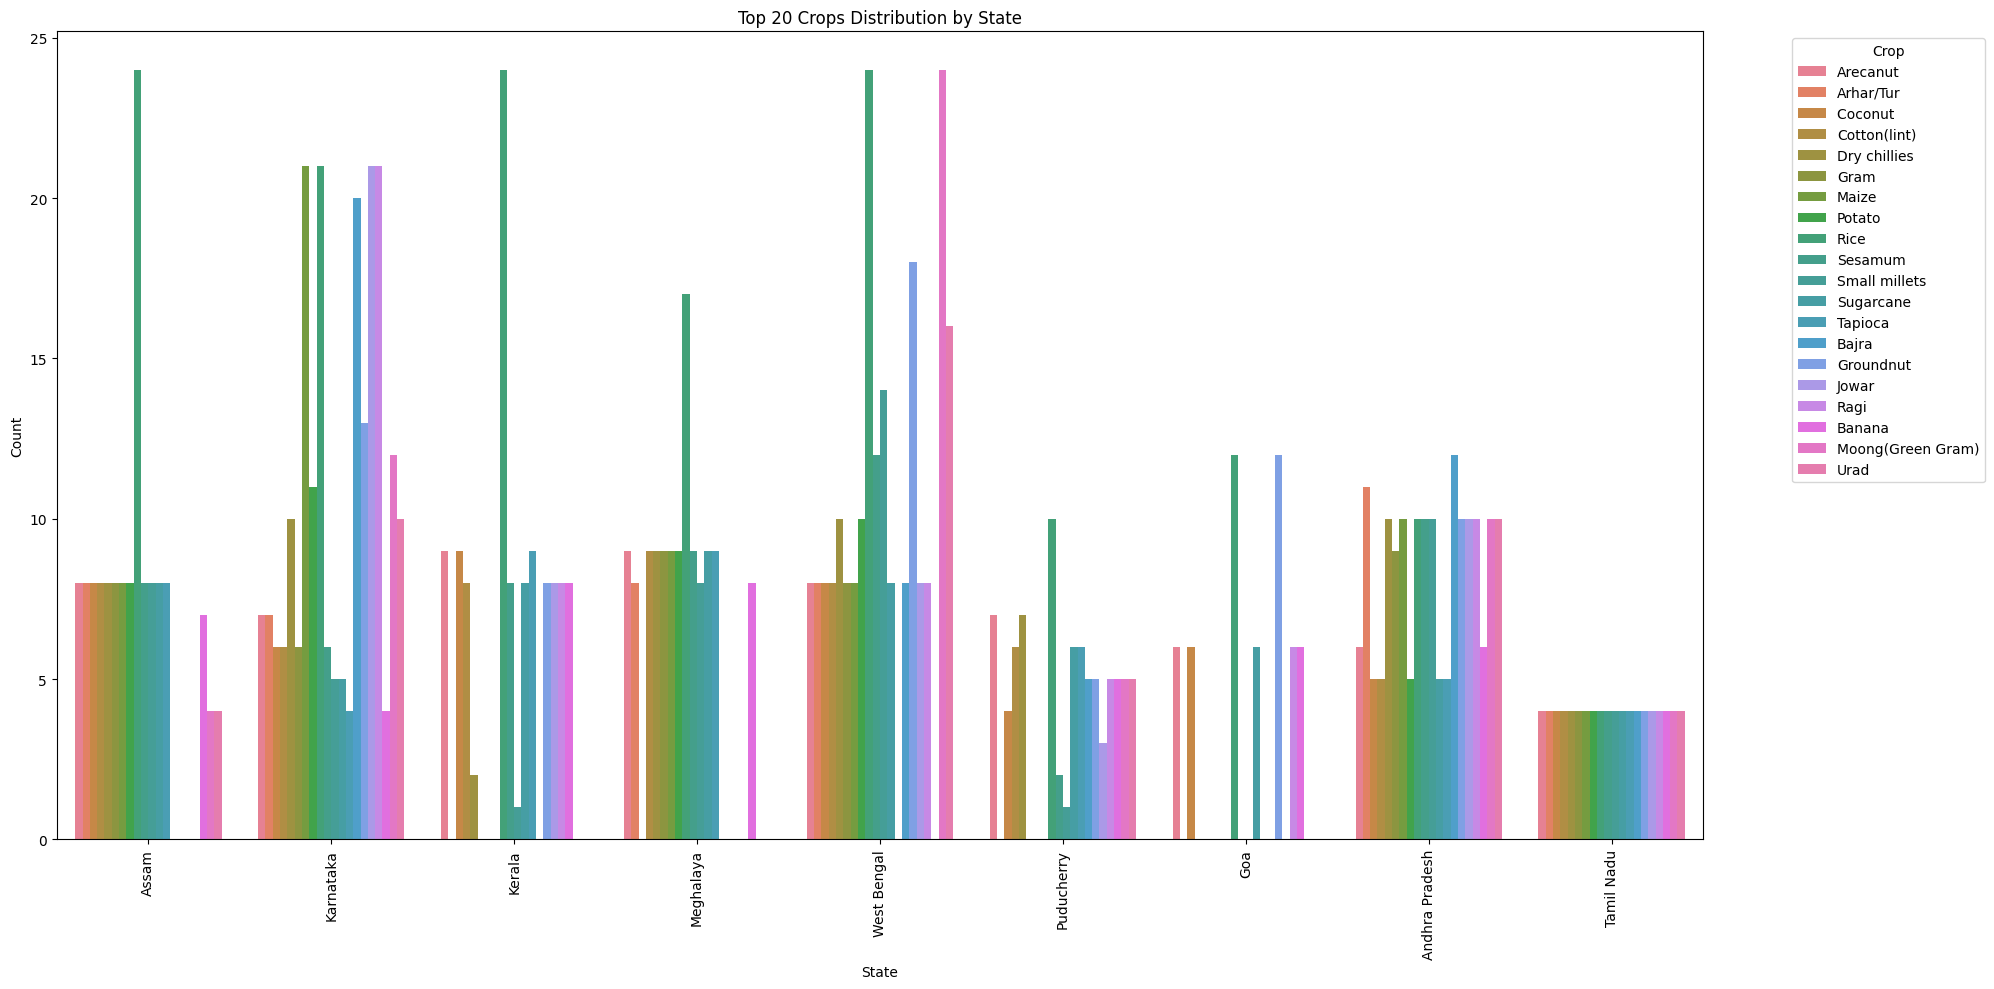

In [9]:
top_20_crops = df['Crop'].value_counts().nlargest(20).index
df_top_20_crops = df[df['Crop'].isin(top_20_crops)]

plt.figure(figsize=(20, 10))
sns.countplot(x='State', hue='Crop', data=df_top_20_crops)
plt.title('Top 20 Crops Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Season wise fertilizer

<Axes: xlabel='Season', ylabel='Fertilizer'>

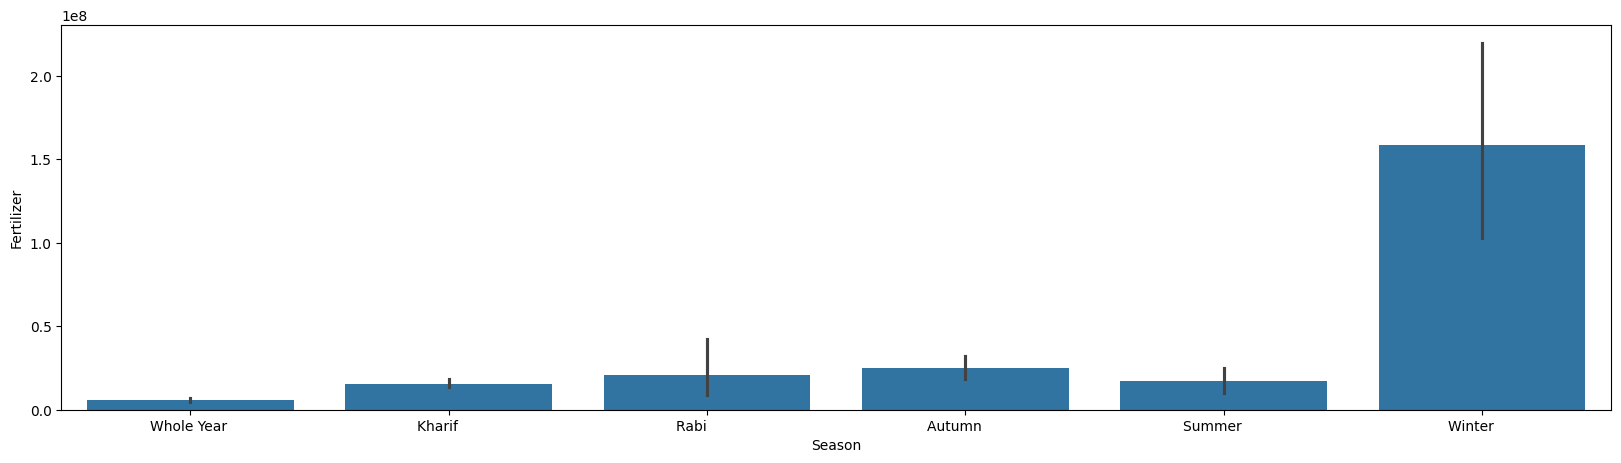

In [10]:
#season fertilizer
plt.figure(figsize=(20,5))
sns.barplot(x='Season',y='Fertilizer',data=df)

Heatmap

<Axes: >

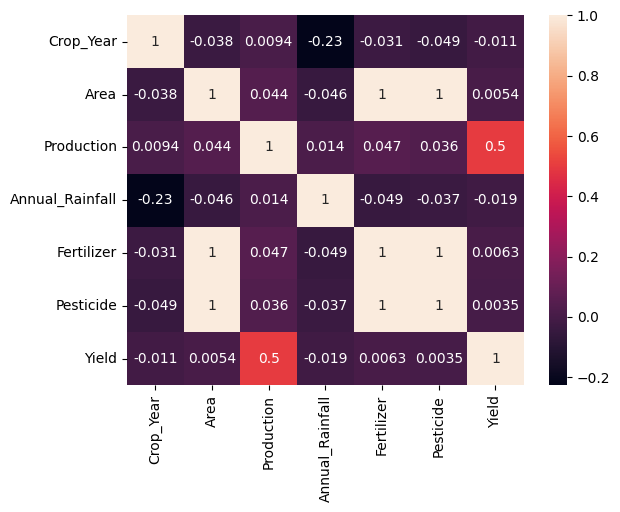

In [11]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

Piechart for knowing Percentage of states involved in agriculture

<Axes: ylabel='count'>

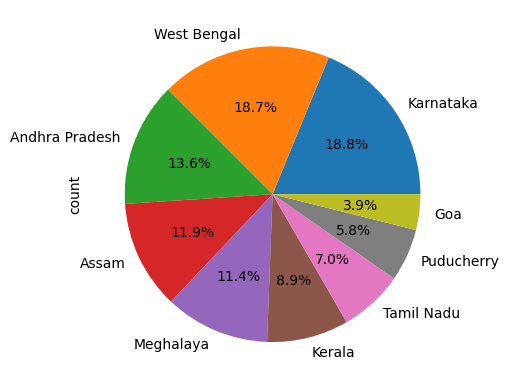

In [12]:
#piechart
df['State'].value_counts().plot.pie(autopct='%1.1f%%')

Donut chart for Season wise growth count

<Axes: ylabel='count'>

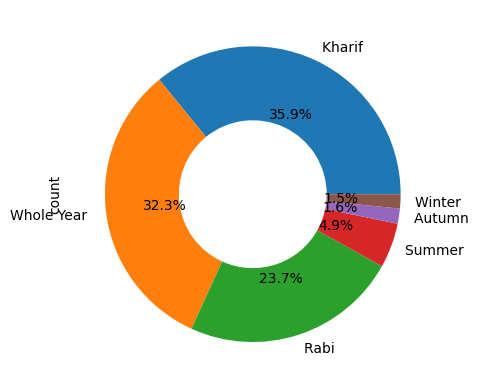

In [13]:
#donutchart for season
df['Season'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops=dict(width=0.5))


State wise production rate

<Axes: xlabel='State', ylabel='Production'>

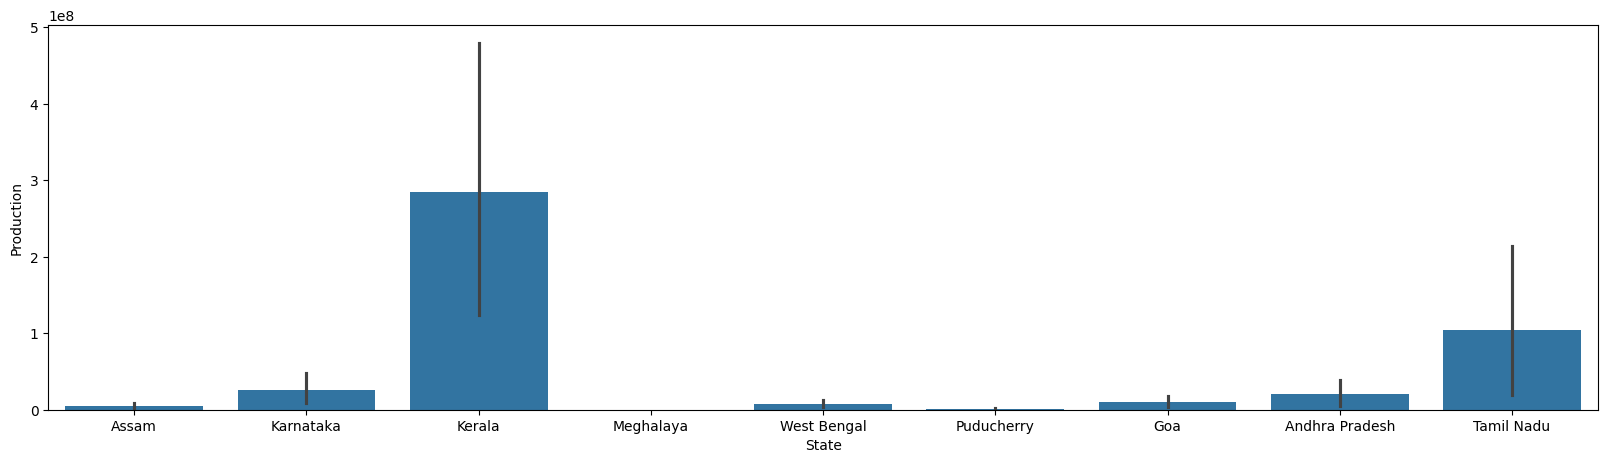

In [14]:
#eda of production rate with state
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Production',data=df)

State wise Area used for Agriculture

<Axes: xlabel='State', ylabel='Area'>

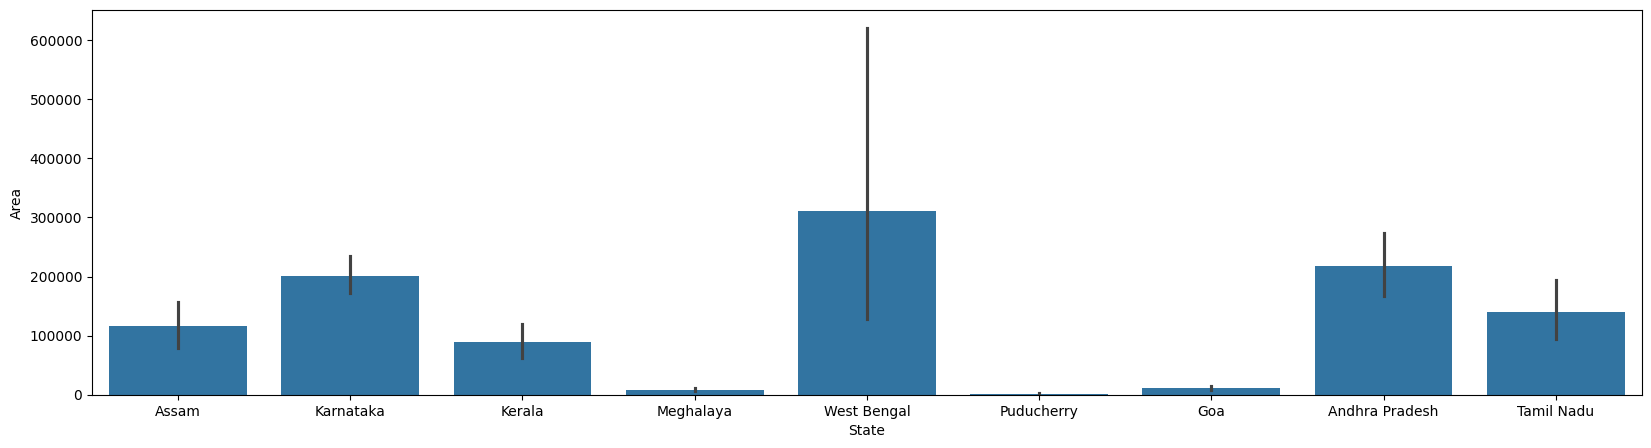

In [15]:
#area with state
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Area',data=df)

Season wise Production rate

<Axes: xlabel='Season', ylabel='Production'>

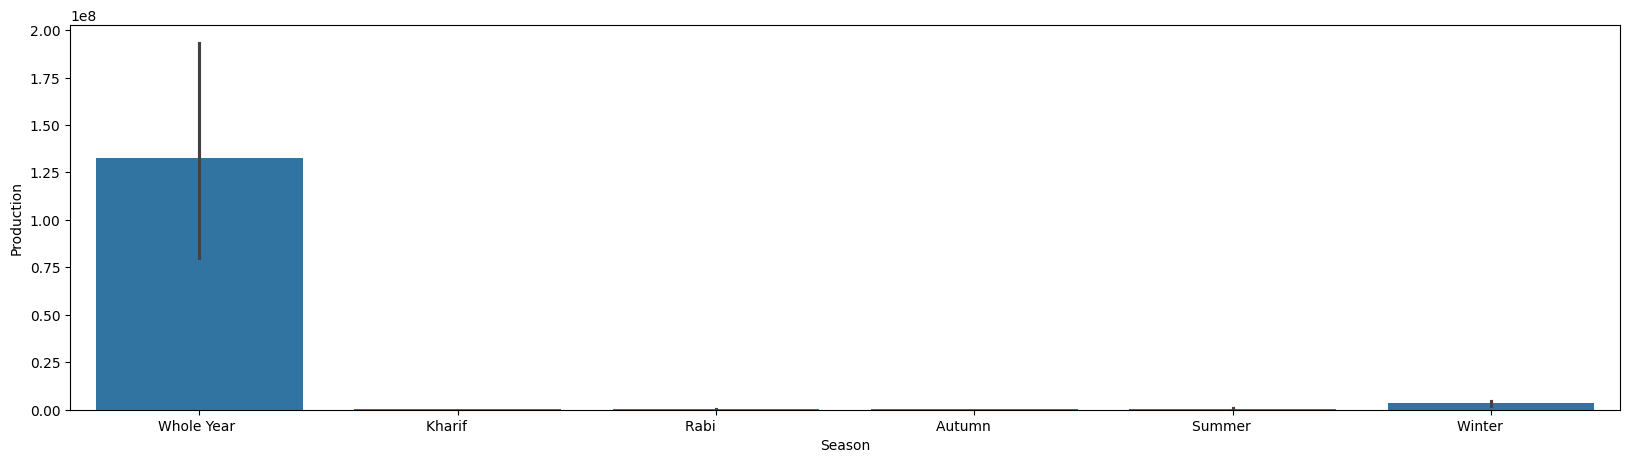

In [16]:
#season and production rate
plt.figure(figsize=(20,5))
sns.barplot(x='Season',y='Production',data=df)


Visualization on States in different  seasons with occupation of area for agriculture


<Axes: xlabel='State', ylabel='Area'>

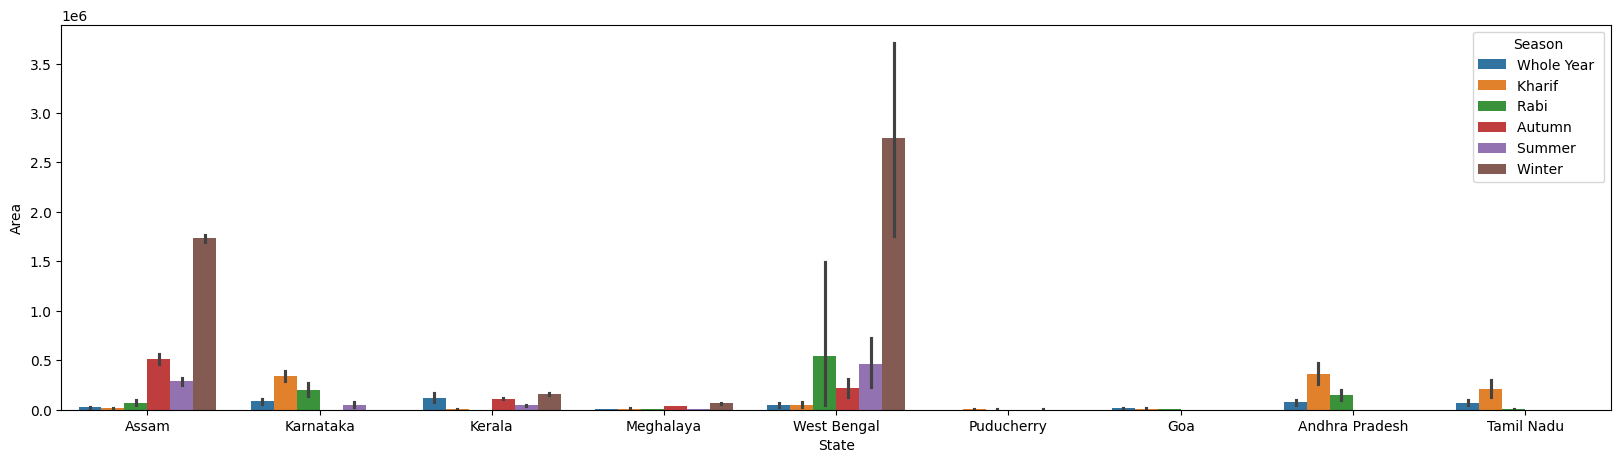

In [17]:
#more
plt.figure(figsize=(20,5))
sns.barplot(x='State',y='Area',hue='Season',data=df)

Year wise production rate

<Axes: xlabel='Crop_Year', ylabel='Production'>

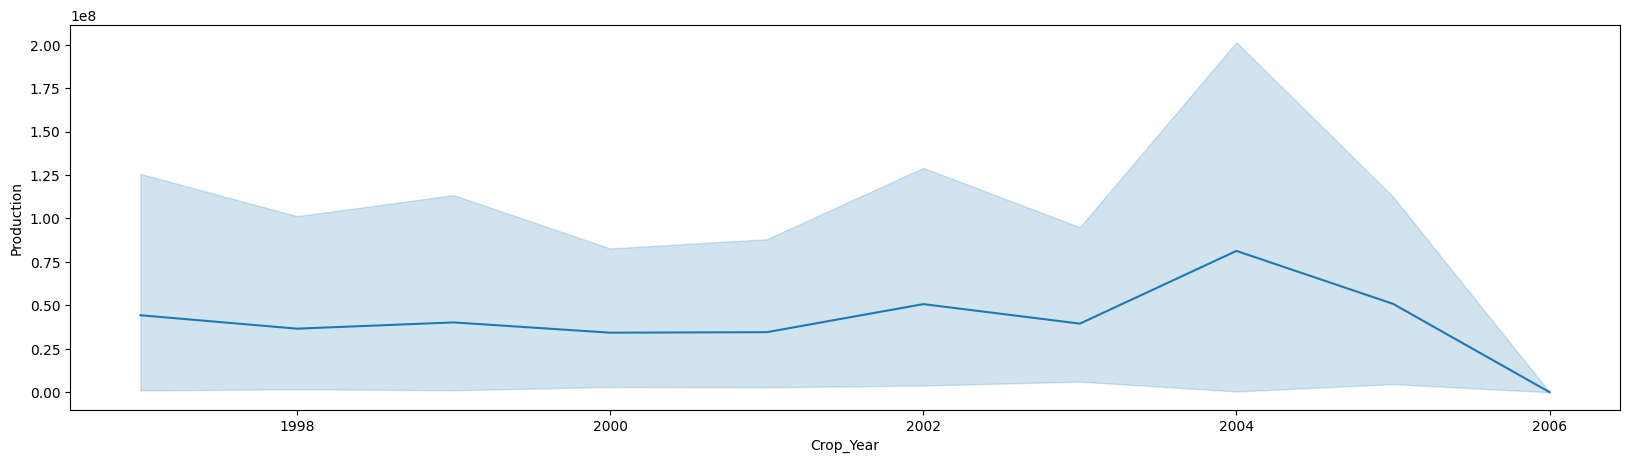

In [18]:
#year production rate not barplot
plt.figure(figsize=(20,5))
sns.lineplot(x='Crop_Year',y='Production',data=df)


Checking State wise  yield count

<Axes: ylabel='count'>

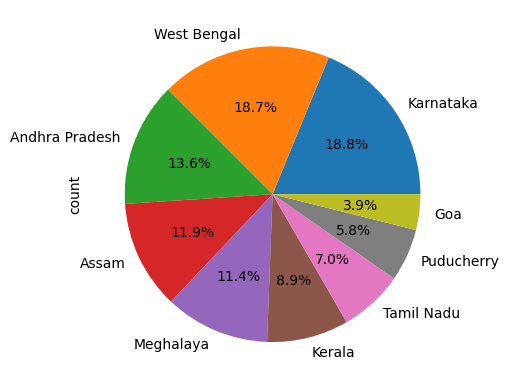

In [19]:
#state with yield pie
df['State'].value_counts().plot.pie(autopct='%1.1f%%')

Distribution of Annual RainFall by state

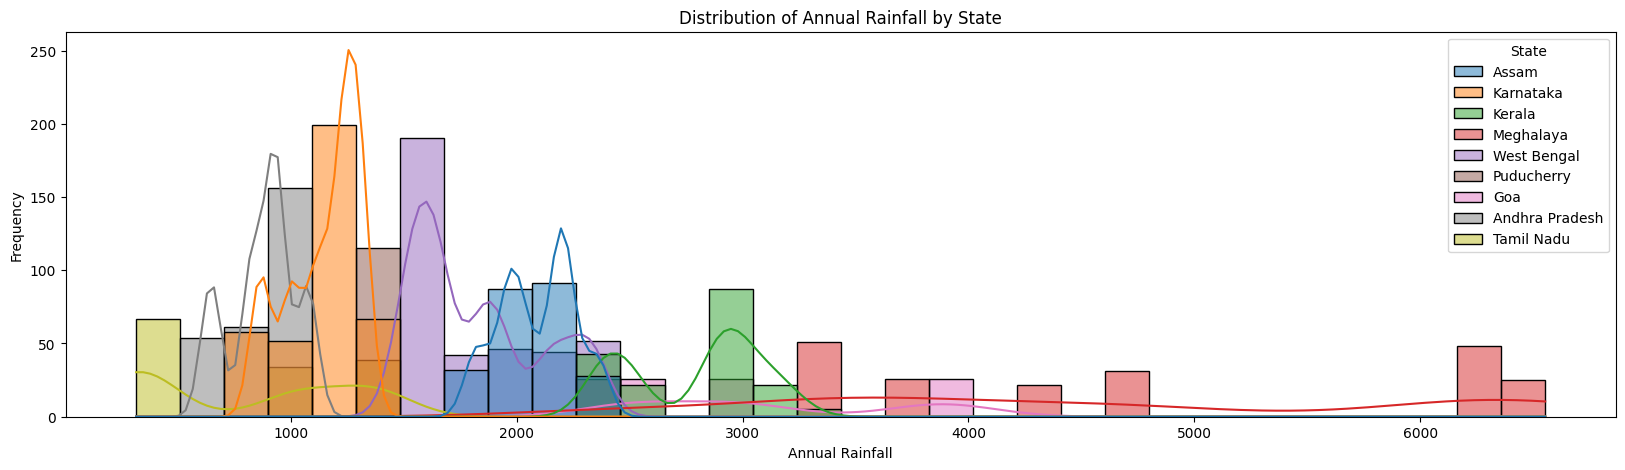

In [20]:
#rainfall with season and yield using distplot
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Annual_Rainfall', hue='State', kde=True)
plt.title('Distribution of Annual Rainfall by State')
plt.xlabel('Annual Rainfall')
plt.ylabel('Frequency')
plt.show()

Rainfall over different seasons

<Axes: xlabel='Annual_Rainfall', ylabel='Count'>

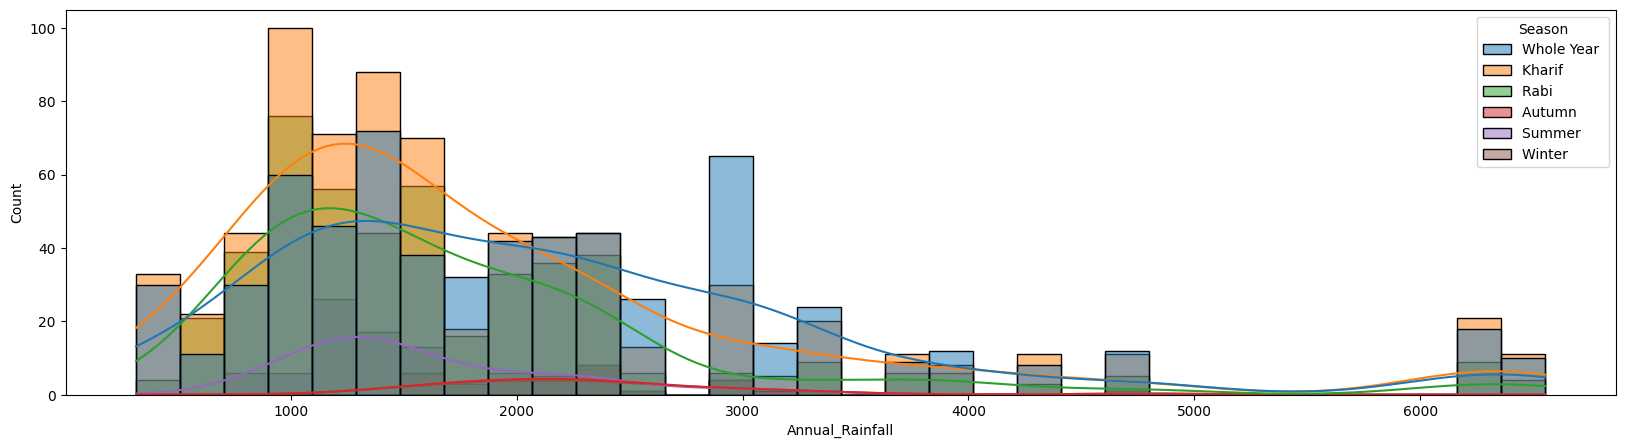

In [21]:
#rainfall over season
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Annual_Rainfall', hue='Season', kde=True)

State wise Rainfall measure

<Axes: xlabel='Annual_Rainfall', ylabel='Count'>

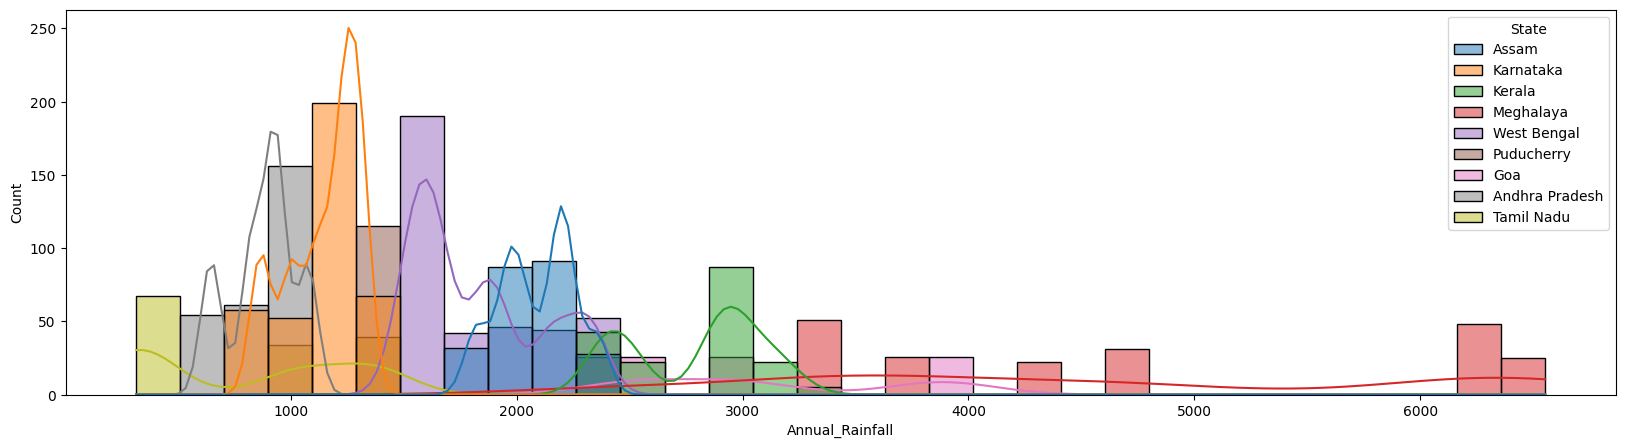

In [22]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='Annual_Rainfall', hue='State', kde=True)

In [23]:
#Converting categorical variables into Numerical
df=pd.get_dummies(df)
df

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,Season_Winter,State_Andhra Pradesh,State_Assam,State_Goa,State_Karnataka,State_Kerala,State_Meghalaya,State_Puducherry,State_Tamil Nadu,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,False,True,False,...,False,False,True,False,False,False,False,False,False,False
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2006,5606.0,3174,845.2,715942.26,1233.32,0.433333,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1996,2006,48995.0,39988,845.2,6257151.45,10778.90,0.737500,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1997,2006,12081.0,6986,845.2,1542864.51,2657.82,0.824545,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1998,2006,50286.0,1224106,845.2,6422025.06,11062.92,26.198095,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [24]:
#feature engineering
df['Area_per_Production']=df['Area']/df['Production']
df

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Andhra Pradesh,State_Assam,State_Goa,State_Karnataka,State_Kerala,State_Meghalaya,State_Puducherry,State_Tamil Nadu,State_West Bengal,Area_per_Production
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,True,False,False,...,False,True,False,False,False,False,False,False,False,1.301651
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,False,True,False,...,False,True,False,False,False,False,False,False,False,1.416649
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,False,False,False,...,False,True,False,False,False,False,False,False,False,36.181818
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,False,False,False,...,False,True,False,False,False,False,False,False,False,0.000155
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,False,False,False,...,False,True,False,False,False,False,False,False,False,2.190176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2006,5606.0,3174,845.2,715942.26,1233.32,0.433333,False,True,False,...,True,False,False,False,False,False,False,False,False,1.766226
1996,2006,48995.0,39988,845.2,6257151.45,10778.90,0.737500,False,False,True,...,True,False,False,False,False,False,False,False,False,1.225243
1997,2006,12081.0,6986,845.2,1542864.51,2657.82,0.824545,False,False,True,...,True,False,False,False,False,False,False,False,False,1.729316
1998,2006,50286.0,1224106,845.2,6422025.06,11062.92,26.198095,False,False,False,...,True,False,False,False,False,False,False,False,False,0.041080


In [25]:
#Checking whether all the categorical variables are converted into numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop_Year                   2000 non-null   int64  
 1   Area                        2000 non-null   float64
 2   Production                  2000 non-null   int64  
 3   Annual_Rainfall             2000 non-null   float64
 4   Fertilizer                  2000 non-null   float64
 5   Pesticide                   2000 non-null   float64
 6   Yield                       2000 non-null   float64
 7   Crop_Arecanut               2000 non-null   bool   
 8   Crop_Arhar/Tur              2000 non-null   bool   
 9   Crop_Bajra                  2000 non-null   bool   
 10  Crop_Banana                 2000 non-null   bool   
 11  Crop_Barley                 2000 non-null   bool   
 12  Crop_Black pepper           2000 non-null   bool   
 13  Crop_Cardamom               2000 

In [26]:
#Exploratory Data Analysis
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Area_per_Production
count,2000.00000,2.000000e+03,2.000000e+03,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,2001.46000,1.584652e+05,4.300460e+07,1954.079581,1.613108e+07,4.131164e+04,200.425529,inf
std,2.53902,1.193262e+06,4.264445e+08,1246.420976,1.145007e+08,3.643646e+05,1316.005395,NaN
min,1997.00000,1.000000e+00,0.000000e+00,315.900000,9.817000e+01,2.100000e-01,0.000000,0.000073
25%,2000.00000,2.446750e+03,2.623500e+03,1117.700000,2.486480e+05,5.985075e+02,0.550000,0.327758
50%,2001.00000,1.247700e+04,2.023800e+04,1629.100000,1.296595e+06,3.096665e+03,1.058571,0.975011
75%,2003.00000,9.144675e+04,1.436500e+05,2354.400000,9.390683e+06,2.212730e+04,2.905417,1.850515
max,2006.00000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,13592.127780,inf


In [28]:
#Dividing the dataset into dependent and independent features
x=df.drop(['Production'],axis=1)
y=df['Production']


In [122]:
y

,Production
0,56708
1,4685
2,22
3,126905000
4,794
...,...
1995,3174
1996,39988
1997,6986
1998,1224106


In [121]:
x

array([0, 1, 2, 3, 4, 5, 6])

In [29]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1600, 72), (400, 72), (1600,), (400,))

Importing necessary modules

In [78]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [79]:
x_train

array([[-0.17683344, -0.11941195, -0.31623039, ..., -0.27828237,
         2.09456568, -0.09696696],
       [-1.36562967,  0.07671247, -0.55206829, ..., -0.27828237,
        -0.47742595, -0.0463698 ],
       [-0.17683344, -0.11161546, -0.10247738, ..., -0.27828237,
        -0.47742595, -0.03123776],
       ...,
       [-0.17683344, -0.10995481, -0.75768897, ..., -0.27828237,
        -0.47742595, -0.03586868],
       [ 0.61569738, -0.00546789, -1.28174661, ...,  3.59347234,
        -0.47742595, -0.09571372],
       [ 0.21943197, -0.09539491,  0.44486109, ..., -0.27828237,
        -0.47742595, -0.1184535 ]])

In [80]:
x_test

array([[ 1.34239425, -0.3717083 ,  1.16813229, ..., -0.25819889,
        -0.48825208, -0.4804356 ],
       [-0.96875797, -0.35369627,  0.2014294 , ..., -0.25819889,
        -0.48825208,  0.27517627],
       [ 0.57201018,  1.22102434, -0.8984981 , ..., -0.25819889,
        -0.48825208,  0.7448528 ],
       ...,
       [ 1.34239425,  0.60590369,  0.18724955, ..., -0.25819889,
        -0.48825208, -0.36297891],
       [-1.35395001, -0.38728337,  0.98437135, ..., -0.25819889,
        -0.48825208, -0.53818725],
       [-0.58356594,  0.23527758, -0.84243823, ..., -0.25819889,
        -0.48825208, -0.08170931]])

### Training a Linear Regression Model

In [100]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)

LinearRegression()

In [125]:
y_pred_lr

array([-6.65516833e+07, -5.13310321e+07,  6.91009560e+07, -4.26553032e+07,
       -5.26142141e+07,  4.11083929e+07,  4.01898649e+07, -3.17030946e+07,
        7.76544971e+07, -2.75965437e+07, -1.58835914e+08,  4.06208279e+06,
        2.36311930e+09, -4.02508665e+07,  2.28910126e+08,  8.50807267e+07,
       -4.01398008e+07,  3.76155000e+06,  3.15023354e+08,  1.88555449e+07,
        7.71417523e+07,  3.68916699e+07, -6.38195584e+07, -5.03231604e+07,
        5.76025727e+07, -1.24937941e+06, -2.97600300e+06, -8.41994430e+07,
       -1.42570937e+07, -1.81042698e+08, -2.24193969e+07, -5.15831353e+07,
       -1.87965707e+08,  2.24840842e+08, -3.56423054e+07, -3.96975438e+07,
       -1.01677869e+08, -1.72084403e+07, -5.89810196e+07,  1.28231408e+08,
       -2.62103931e+07,  2.28087281e+06,  2.05084352e+08, -4.50755265e+07,
        6.64603096e+07, -4.74615936e+07, -3.36447050e+07,  5.69190031e+06,
        4.47156160e+07, -2.88085297e+07, -5.31444168e+06,  1.47034596e+08,
        6.61071782e+07,  

### Evaluating the Linear Regression Model

In [124]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_lr = lr_regressor.predict(x_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R2 Score: {r2_lr}")
print(f"Linear Regression Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr)}")

Linear Regression Mean Squared Error: 1.1812849752756069e+17
Linear Regression R2 Score: 0.5140274719480227
Linear Regression Mean Absolute Error: 112848192.2136958


### Training a Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

### Evaluating the Decision Tree Regressor

In [126]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor R2 Score: {r2_dt}")
print(f"Decision Tree Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt)}")

Decision Tree Regressor Mean Squared Error: 1.6395378164251305e+18
Decision Tree Regressor R2 Score: -5.744946005082677
Decision Tree Regressor Mean Absolute Error: 447951977.1475


### Training a Support Vector Regressor

In [104]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Regressor model
svr_regressor = SVR(kernel='rbf')  # Using radial basis function kernel
svr_regressor.fit(x_train, y_train)

SVR()

### Evaluating the Support Vector Regressor

In [127]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_svr = svr_regressor.predict(x_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor Mean Squared Error: {mse_svr}")
print(f"Support Vector Regressor R2 Score: {r2_svr}")
print(f"Support Vector Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_svr)}")

Support Vector Regressor Mean Squared Error: 2.457479887319552e+17
Support Vector Regressor R2 Score: -0.010990352432896255
Support Vector Regressor Mean Absolute Error: 51700555.58557153


### Training a Ridge Regression Model

In [111]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0) # You can tune the alpha parameter
ridge_regressor.fit(x_train, y_train)

Ridge()

### Evaluating the Ridge Regression Model

In [128]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_ridge = ridge_regressor.predict(x_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R2 Score: {r2_ridge}")
print(f"Ridge Regression Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")

Ridge Regression Mean Squared Error: 1.183220104597583e+17
Ridge Regression R2 Score: 0.5132313730316804
Ridge Regression Mean Absolute Error: 107344239.42242835


### Training a Lasso Regression Model

In [115]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_regressor = Lasso(alpha=1.0) # You can tune the alpha parameter
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.191e+19, tolerance: 2.663e+16
  model = cd_fast.enet_coordinate_descent(


Lasso()

### Evaluating the Lasso Regression Model

In [129]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_lasso = lasso_regressor.predict(x_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression R2 Score: {r2_lasso}")
print(f"Lasso Regression Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")

Lasso Regression Mean Squared Error: 1.1840612221543437e+17
Lasso Regression R2 Score: 0.5128853430439948
Lasso Regression Mean Absolute Error: 110348464.99362382


# ENSEMBLE ***LEARNING*** **bold text**

### Training a Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluating the Random Forest Regressor

In [130]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor R2 Score: {r2_rf}")
print(f"Random Forest Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")

Random Forest Regressor Mean Squared Error: 1.0994120936200867e+18
Random Forest Regressor R2 Score: -3.5229058668321436
Random Forest Regressor Mean Absolute Error: 460038472.573225


### Training a Gradient Boosting Regressor

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gbr_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

### Evaluating the Gradient Boosting Regressor

### Training an AdaBoost Regressor

In [134]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor # AdaBoost often uses a Decision Tree as the base estimator

# Initialize the base estimator
base_estimator = DecisionTreeRegressor(max_depth=4) # You can tune the max_depth

# Initialize and train the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=42) # You can tune n_estimators and learning_rate
adaboost_regressor.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=42)

In [ ]:
#EVALUATE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


### Evaluating the AdaBoost Regressor

In [136]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_adaboost = adaboost_regressor.predict(x_test)

# Evaluate the model
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

print(f"AdaBoost Regressor Mean Squared Error: {mse_adaboost}")
print(f"AdaBoost Regressor R2 Score: {r2_adaboost}")
print(f"AdaBoost Regressor Mean Absolute Error: {mae_adaboost}")

AdaBoost Regressor Mean Squared Error: 6.639261820449162e+17
AdaBoost Regressor R2 Score: -1.7313467273465273
AdaBoost Regressor Mean Absolute Error: 291895533.1415808


In [131]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_gbr = gbr_regressor.predict(x_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting Regressor R2 Score: {r2_gbr}")
print(f"Gradient Boosting Regressor Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gbr)}")

Gradient Boosting Regressor Mean Squared Error: 2.783742896781814e+18
Gradient Boosting Regressor R2 Score: -10.452127143834739
Gradient Boosting Regressor Mean Absolute Error: 614971204.6766058


### Visualizing Model Performance Comparison

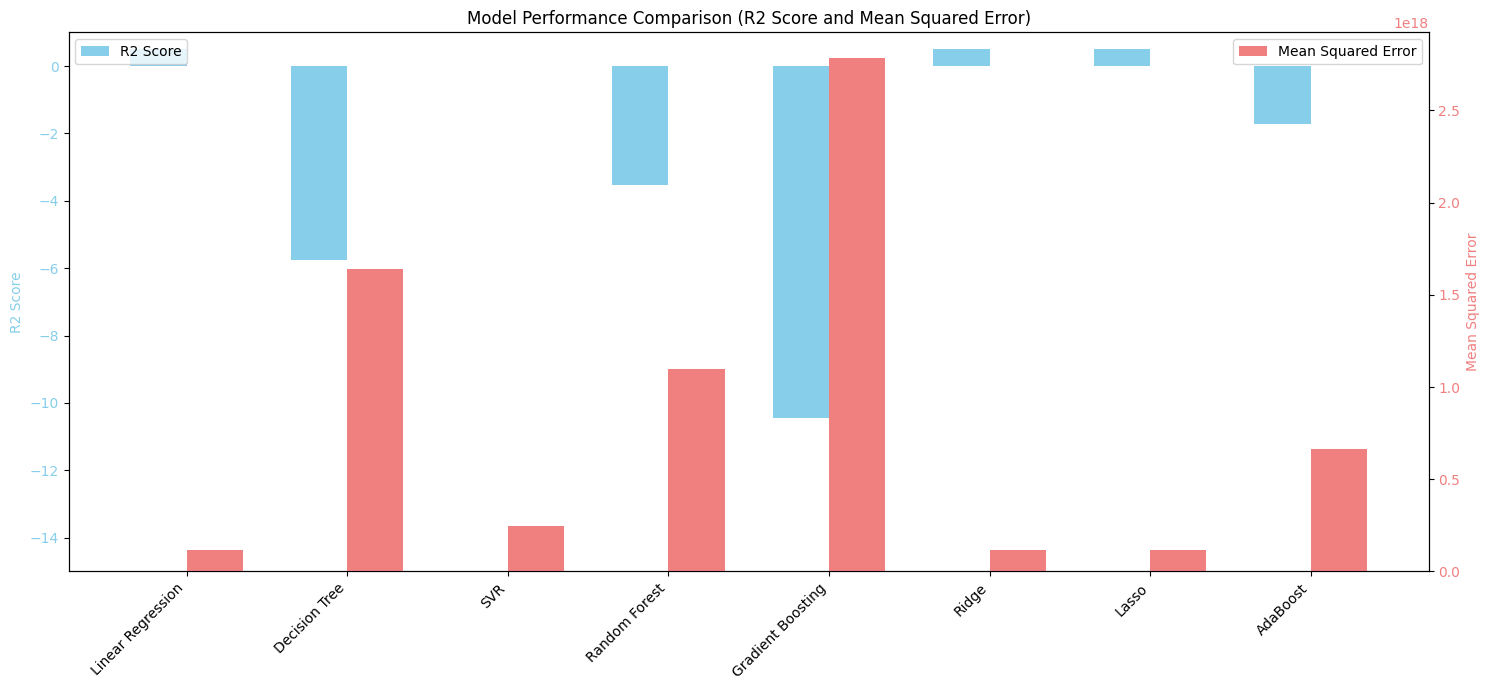

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Decision Tree', 'SVR', 'Random Forest', 'Gradient Boosting', 'Ridge', 'Lasso', 'AdaBoost']

# R2 Scores
r2_scores = [r2_lr, r2_dt, r2_svr, r2_rf, r2_gbr, r2_ridge, r2_lasso, r2_adaboost]

# Mean Squared Errors
mse_values = [mse_lr, mse_dt, mse_svr, mse_rf, mse_gbr, mse_ridge, mse_lasso, mse_adaboost]

x = np.arange(len(models)) # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(15, 7))

# Plotting R2 scores on the primary y-axis
rects1 = ax1.bar(x - width/2, r2_scores, width, label='R2 Score', color='skyblue')
ax1.set_ylabel('R2 Score', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim([-15, 1]) # Adjust y-limit for R2 scores

# Create a second y-axis for Mean Squared Error
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, mse_values, width, label='Mean Squared Error', color='lightcoral')
ax2.set_ylabel('Mean Squared Error', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# Add some text for labels, title and custom x-axis tick labels
ax1.set_title('Model Performance Comparison (R2 Score and Mean Squared Error)')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha="right")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [139]:
#CONCLUSION
print("Based on the analysis of the trained regression models (Linear Regression, Decision Tree Regressor, Support Vector Regressor, Random Forest Regressor, Gradient Boosting Regressor, Ridge Regression, Lasso Regression, and AdaBoost Regressor):")
print("\nModel Performance (R2 Score - higher is better, Mean Squared Error - lower is better):")
print(f"- Linear Regression: R2 Score: {r2_lr:.4f}, MSE: {mse_lr:.2f}")
print(f"- Decision Tree Regressor: R2 Score: {r2_dt:.4f}, MSE: {mse_dt:.2f}")
print(f"- Support Vector Regressor: R2 Score: {r2_svr:.4f}, MSE: {mse_svr:.2f}")
print(f"- Random Forest Regressor: R2 Score: {r2_rf:.4f}, MSE: {mse_rf:.2f}")
print(f"- Gradient Boosting Regressor: R2 Score: {r2_gbr:.4f}, MSE: {mse_gbr:.2f}")
print(f"- Ridge Regression: R2 Score: {r2_ridge:.4f}, MSE: {mse_ridge:.2f}")
print(f"- Lasso Regression: R2 Score: {r2_lasso:.4f}, MSE: {mse_lasso:.2f}")
print(f"- AdaBoost Regressor: R2 Score: {r2_adaboost:.4f}, MSE: {mse_adaboost:.2f}")


print("\nConclusion:")
print("Based on the R2 Score (higher is better) and Mean Squared Error (lower is better), the Linear Regression model continues to demonstrate the best performance among all the evaluated models for this dataset and split, achieving the highest R2 score and the lowest Mean Squared Error. The other models, including AdaBoost Regressor, exhibited lower R2 scores (some negative) and higher Mean Squared Errors, indicating they were not as suitable for this specific regression task on this data.")

Based on the analysis of the trained regression models (Linear Regression, Decision Tree Regressor, Support Vector Regressor, Random Forest Regressor, Gradient Boosting Regressor, Ridge Regression, Lasso Regression, and AdaBoost Regressor):

Model Performance (R2 Score - higher is better, Mean Squared Error - lower is better):
- Linear Regression: R2 Score: 0.5140, MSE: 118128497527560688.00
- Decision Tree Regressor: R2 Score: -5.7449, MSE: 1639537816425130496.00
- Support Vector Regressor: R2 Score: -0.0110, MSE: 245747988731955200.00
- Random Forest Regressor: R2 Score: -3.5229, MSE: 1099412093620086656.00
- Gradient Boosting Regressor: R2 Score: -10.4521, MSE: 2783742896781813760.00
- Ridge Regression: R2 Score: 0.5132, MSE: 118322010459758304.00
- Lasso Regression: R2 Score: 0.5129, MSE: 118406122215434368.00
- AdaBoost Regressor: R2 Score: -1.7313, MSE: 663926182044916224.00

Conclusion:
Based on the R2 Score (higher is better) and Mean Squared Error (lower is better), the Linear